In [1]:
#Imports
import numpy as np
import pandas as pd
import tensorflow.keras.backend as k
from sklearn.preprocessing import MinMaxScaler,  RobustScaler
from tensorflow import keras
from tensorflow.keras import Sequential, layers, optimizers, losses, regularizers
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import Huber



In [2]:
import numpy as np
import pandas as pd

# Read a specific sheet
df = pd.read_excel(r"C:\Users\William\OneDrive\Documents\Data Cleaning\LARUAN.xlsx",
                   sheet_name='04-VAL04H-PM-1 MIRANDA-PSAN_Pre')

df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,PMP,04-VAL04H-PM-1 MIRANDA-PSAN_Pressure,DATETIME,PSI
6,NaN,NaN,2022-01-01 00:00:00,[-11057] Not Enough Values For Calculation
7,NaN,NaN,2022-01-01 00:15:00,[-11057] Not Enough Values For Calculation
8,NaN,NaN,2022-01-01 00:30:00,[-11057] Not Enough Values For Calculation
9,NaN,NaN,2022-01-01 00:45:00,[-11057] Not Enough Values For Calculation


In [3]:
# Don't use this unless you're gonna change your prv dataset.
# to clean

df.drop(['Unnamed: 1', 'Unnamed: 0'], axis=1, inplace=True)
df.to_csv('semicleaned3.csv', index=False)
df.head(100)

,Unnamed: 2,Unnamed: 3
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
95,2022-01-01 22:15:00,[-11057] Not Enough Values For Calculation
96,2022-01-01 22:30:00,[-11057] Not Enough Values For Calculation
97,2022-01-01 22:45:00,[-11057] Not Enough Values For Calculation
98,2022-01-01 23:00:00,[-11057] Not Enough Values For Calculation


In [4]:
import numpy as np
import pandas as pd
#Cleaning changing Not enough values to NaN
df3 = pd.read_csv("semicleaned3.csv", skiprows=6)
df3.columns = ['DATETIME', 'PSI']
df3.replace('[-11057] Not Enough Values For Calculation', np.nan, inplace=True)
#changing data types

df3['PSI'] = pd.to_numeric(df3['PSI'], errors='coerce')
df3['DATETIME'] = pd.to_datetime(df3['DATETIME'], errors='coerce')
df3.dtypes
df3

,DATETIME,PSI
0,2022-01-01 00:00:00,NaN
1,2022-01-01 00:15:00,NaN
2,2022-01-01 00:30:00,NaN
3,2022-01-01 00:45:00,NaN
4,2022-01-01 01:00:00,NaN
...,...,...
101659,2024-11-24 22:45:00,7.81
101660,2024-11-24 23:00:00,9.23
101661,2024-11-24 23:15:00,9.94
101662,2024-11-24 23:30:00,8.52


In [5]:
df_new = df3.copy()  # Creates a separate copy
df_new.index = df_new['DATETIME']
df_new.drop('DATETIME', axis=1, inplace=True)

df_new




,PSI
DATETIME,
2022-01-01 00:00:00,NaN
2022-01-01 00:15:00,NaN
2022-01-01 00:30:00,NaN
2022-01-01 00:45:00,NaN
2022-01-01 01:00:00,NaN
...,...
2024-11-24 22:45:00,7.81
2024-11-24 23:00:00,9.23
2024-11-24 23:15:00,9.94


In [6]:
df_new.loc[df_new['PSI'] > 30, 'PSI'] = np.nan
df_new['PSI'] = df_new['PSI'].interpolate(method='time')
df_new['PSI'] = df_new['PSI'].rolling(window=5, center=True, min_periods=1).median()

In [7]:
df_new.isnull().sum()

PSI    7103
dtype: int64

In [8]:
df_new.fillna(0.01, inplace=True)

In [9]:
df_new[df_new < 0] = 0.01

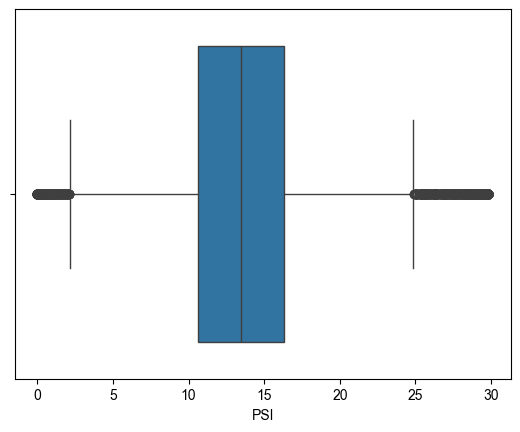

<Figure size 1000x600 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(data=df_new, x='PSI')
# Set the figure size
plt.figure(figsize=(10, 6))
# Set the style of the plot
sns.set(style="whitegrid")

# Show the plot
plt.show()

In [11]:
df_new

,PSI
DATETIME,
2022-01-01 00:00:00,0.01
2022-01-01 00:15:00,0.01
2022-01-01 00:30:00,0.01
2022-01-01 00:45:00,0.01
2022-01-01 01:00:00,0.01
...,...
2024-11-24 22:45:00,8.52
2024-11-24 23:00:00,8.52
2024-11-24 23:15:00,9.23


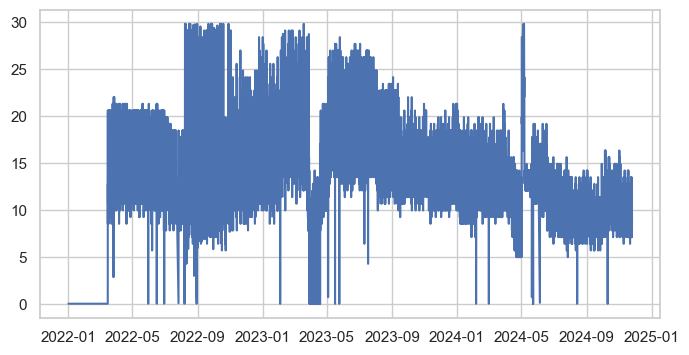

In [12]:
#visualizing my dataframe
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

# Plot using numerical indices on the x-axis
plt.plot(df_new.index, df_new['PSI'], label='PSI')
# Formatting




In [13]:
df_new['PSI']




DATETIME
2022-01-01 00:00:00    0.01
2022-01-01 00:15:00    0.01
2022-01-01 00:30:00    0.01
2022-01-01 00:45:00    0.01
2022-01-01 01:00:00    0.01
                       ... 
2024-11-24 22:45:00    8.52
2024-11-24 23:00:00    8.52
2024-11-24 23:15:00    9.23
2024-11-24 23:30:00    9.23
2024-11-24 23:45:00    9.23
Name: PSI, Length: 101664, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
len(df_new)



101664

In [15]:
scaler.fit(df_new)


MinMaxScaler()

In [16]:
scaled_data = scaler.transform(df_new)


In [24]:
def create_input_output(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length + 1):
        # Input: Sequence of past values
        X.append(data[i:i + input_length])
        # Output: Sequence of future values
        y.append(data[i + input_length:i + input_length + output_length])
    return np.array(X), np.array(y)

INPUT_LENGTH = 30  # Number of past time steps (input sequence length)
OUTPUT_LENGTH = 1  # Number of future time steps (output sequence length)

# Create input-output sequences
X, y = create_input_output(scaled_data, INPUT_LENGTH, OUTPUT_LENGTH)

# Reshape for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, time steps, features)

# Train-Test Split (70% training, 30% testing)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes for verification
print("X_train shape:", X_train.shape)  # (samples, input_length, features)
print("X_test shape:", X_test.shape)    # (samples, input_length, features)
print("y_train shape:", y_train.shape)  # (samples, output_length)
print("y_test shape:", y_test.shape)    # (samples, output_length)


X_train shape: (71143, 30, 1)
X_test shape: (30491, 30, 1)
y_train shape: (71143, 1, 1)
y_test shape: (30491, 1, 1)


In [25]:
print(f"Length of scaled_data: {len(scaled_data)}")
print(f"Required length: {INPUT_LENGTH + OUTPUT_LENGTH}")

Length of scaled_data: 101664
Required length: 31


In [32]:
#building model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    BatchNormalization(), 
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(), 
    Dropout(0.3),
    Dense(1)
])

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,305 (118.38 KB)

 Trainable params: 30,081 (117.50 KB)

 Non-trainable params: 224 (896.00 B)

In [34]:

# Compile model with Huber loss and Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=Huber(delta=1),
    metrics=['mae']
)

# Reduce LR if validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)

# Model checkpoint to save the best model
model_checkpoint = ModelCheckpoint(
    filepath="Predict15steps.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[ reduce_lr, model_checkpoint],
    verbose=1
)

Epoch 1/40
2220/2224 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4606 - mae: 0.8084
Epoch 1: val_loss improved from inf to 0.00568, saving model to Predict15steps.keras
2224/2224 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - loss: 0.4603 - mae: 0.8080 - val_loss: 0.0057 - val_mae: 0.0686 - learning_rate: 1.0000e-04
Epoch 2/40
2224/2224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1439 - mae: 0.3795
Epoch 2: val_loss improved from 0.00568 to 0.00526, saving model to Predict15steps.keras
2224/2224 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 0.1439 - mae: 0.3794 - val_loss: 0.0053 - val_mae: 0.0673 - learning_rate: 1.0000e-04
Epoch 3/40
2219/2224 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0654 - mae: 0.2317
Epoch 3: val_loss improved from 0.00526 to 0.00300, saving model to Predict15steps.keras
2224/2224 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 0.0653 - mae: 0.2316 - val_loss: 0.0030 - val_mae: 0.0316 - learning_rate: 1.0000e-04
Epoch 4/40
2222/2224 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0273 

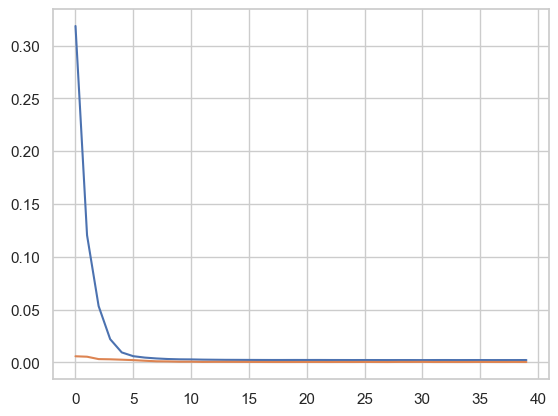

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
loss_per_epoch = model.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [36]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("Predict15steps.keras")

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,469 (353.40 KB)

 Trainable params: 30,081 (117.50 KB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 60,164 (235.02 KB)

In [38]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

953/953 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


In [40]:
# Reshape y_pred to match y_test
epsilon = 0.1  # Small constant to avoid division by zero
#y_pred = np.squeeze(y_pred)  # Remove the last dimension if it exists
# Validate the shapes
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (30491, 1, 1)
y_pred shape: (30491, 1)


In [41]:
# Reshape y_test and y_pred to match each other
y_test = np.squeeze(y_test)  # Remove the last dimension from y_test
y_pred = np.squeeze(y_pred)  # Remove the last dimension from y_pred

# Validate the shapes
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

# Calculate SMAPE
# SMAPE function
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100
print(f'MAPE: {mape:.4f}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.4f}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.4f}')

y_test shape: (30491,)
y_pred shape: (30491,)
MAPE: 2.8970
MAE: 0.0133
RMSE: 0.0217


C:\Users\William\AppData\Local\Temp\ipykernel_13932\3525890340.py:10: RuntimeWarning: divide by zero encountered in divide
  mape_value = 100 * np.mean(np.abs((y_test_flat - y_pred_flat) / y_test_flat))


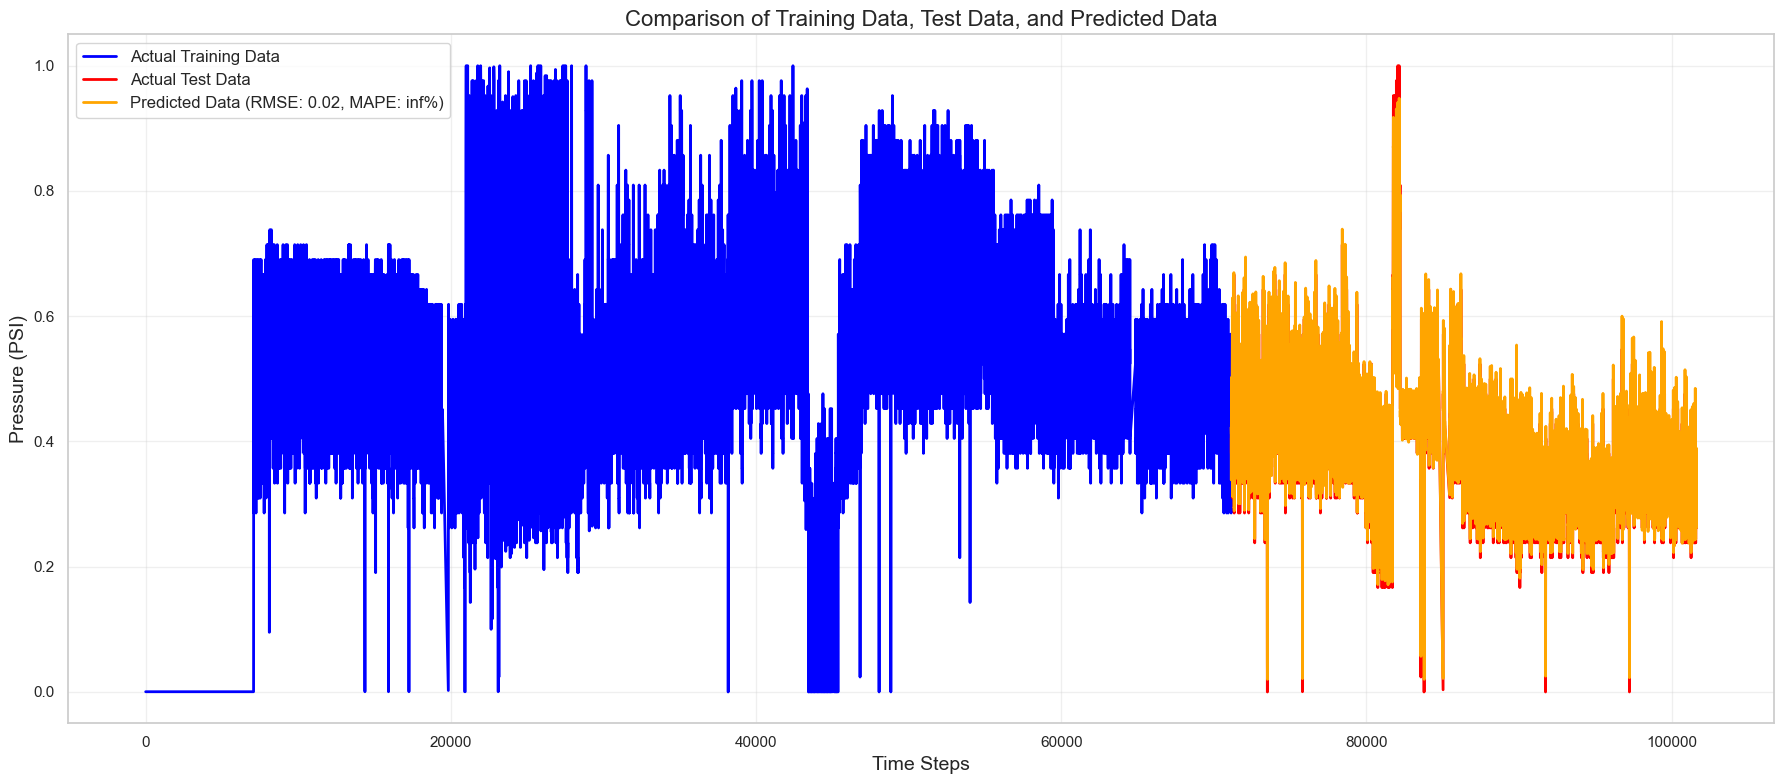

In [42]:
import matplotlib.pyplot as plt

# Flatten y_train, y_test, and y_pred if necessary
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
mape_value = 100 * np.mean(np.abs((y_test_flat - y_pred_flat) / y_test_flat))

# Plot the comparison
plt.figure(figsize=(18, 8))

# Plot actual training data
plt.plot(range(len(y_train_flat)), y_train_flat, label="Actual Training Data", color="blue", linewidth=2)  # Blue

# Plot actual test data
plt.plot(range(len(y_train_flat), len(y_train_flat) + len(y_test_flat)), 
         y_test_flat, label="Actual Test Data", color="red", linewidth=2)  # Orange

# Plot predicted data
plt.plot(range(len(y_train_flat), len(y_train_flat) + len(y_pred_flat)), 
         y_pred_flat, label=f"Predicted Data (RMSE: {rmse:.2f}, MAPE: {mape_value:.2f}%)", color="orange", linewidth=2)  # Green

# Formatting
plt.title("Comparison of Training Data, Test Data, and Predicted Data", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Pressure (PSI)", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


Testing

In [43]:
from tensorflow.keras.models import load_model
import numpy as np

model = load_model('Predict15steps.keras')  # Load your trained model

In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Example synthetic data (replace with your data)
synthetic_data = pd.read_csv('TestingData.csv')  

# Apply your preprocessing pipeline # Time interpolation
synthetic_data.fillna(0.1, inplace=True)                  # Replace NaN with 0
synthetic_data = synthetic_data.rolling(window=11, min_periods=1).median()  # Rolling median

# Min-Max Scaling (use the same scaler as training or fit a new one)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(synthetic_data)  # Or use scaler from training

In [50]:
synthetic_data

,8.5058
0,10.46030
1,9.52460
2,10.46030
3,9.56615
4,10.46030
...,...
189,10.46030
190,10.03400
191,10.46030
192,10.15870


In [51]:
y_pred = model.predict(X_test)  # Predict 15 steps ahead

953/953 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [52]:
y_test = np.squeeze(y_test)  # Remove the last dimension from y_test
y_pred = np.squeeze(y_pred) 

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure y_test and y_pred are reshaped to 2D or 1D arrays
y_test = np.squeeze(y_test)  # Remove extra dimensions if any
y_pred = np.squeeze(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate SMAPE with a threshold
threshold = 0.1  # Define a threshold for small values
valid_indices = (np.abs(y_test) > threshold) | (np.abs(y_pred) > threshold)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# --- STEP 5: Print Actual vs Predicted Values ---
print("\n--- Actual vs Predicted Values ---")
for i in range(len(y_test)):
    print(f"\nSample {i+1}:")
    print("Actual    :", np.round(y_test[i], 2))  # Rounded for readability
    print("Predicted :", np.round(y_pred[i], 2))

# --- STEP 6: Evaluate Forecast Accuracy ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE (handle division by zero by adding a small constant)
epsilon = 0.1  # Small constant to avoid division by zero
mape = np.mean(np.abs((y_test - y_pred) / (y_test + epsilon))) * 100

print(f"\n--- Evaluation Metrics ---\nMAE: {mae:.4f}\nRMSE: {rmse:.4f}\nMAPE: {mape:.2f}%")


--- Actual vs Predicted Values ---

Sample 1:
Actual    : 0.4
Predicted : 0.34

Sample 2:
Actual    : 0.4
Predicted : 0.42

Sample 3:
Actual    : 0.4
Predicted : 0.42

Sample 4:
Actual    : 0.4
Predicted : 0.41

Sample 5:
Actual    : 0.4
Predicted : 0.4

Sample 6:
Actual    : 0.38
Predicted : 0.4

Sample 7:
Actual    : 0.38
Predicted : 0.38

Sample 8:
Actual    : 0.4
Predicted : 0.38

Sample 9:
Actual    : 0.4
Predicted : 0.41

Sample 10:
Actual    : 0.43
Predicted : 0.41

Sample 11:
Actual    : 0.43
Predicted : 0.44

Sample 12:
Actual    : 0.43
Predicted : 0.43

Sample 13:
Actual    : 0.43
Predicted : 0.43

Sample 14:
Actual    : 0.48
Predicted : 0.43

Sample 15:
Actual    : 0.48
Predicted : 0.48

Sample 16:
Actual    : 0.45
Predicted : 0.48

Sample 17:
Actual    : 0.45
Predicted : 0.45

Sample 18:
Actual    : 0.45
Predicted : 0.45

Sample 19:
Actual    : 0.45
Predicted : 0.45

Sample 20:
Actual    : 0.48
Predicted : 0.45

Sample 21:
Actual    : 0.48
Predicted : 0.48

Sample 22:
Actu

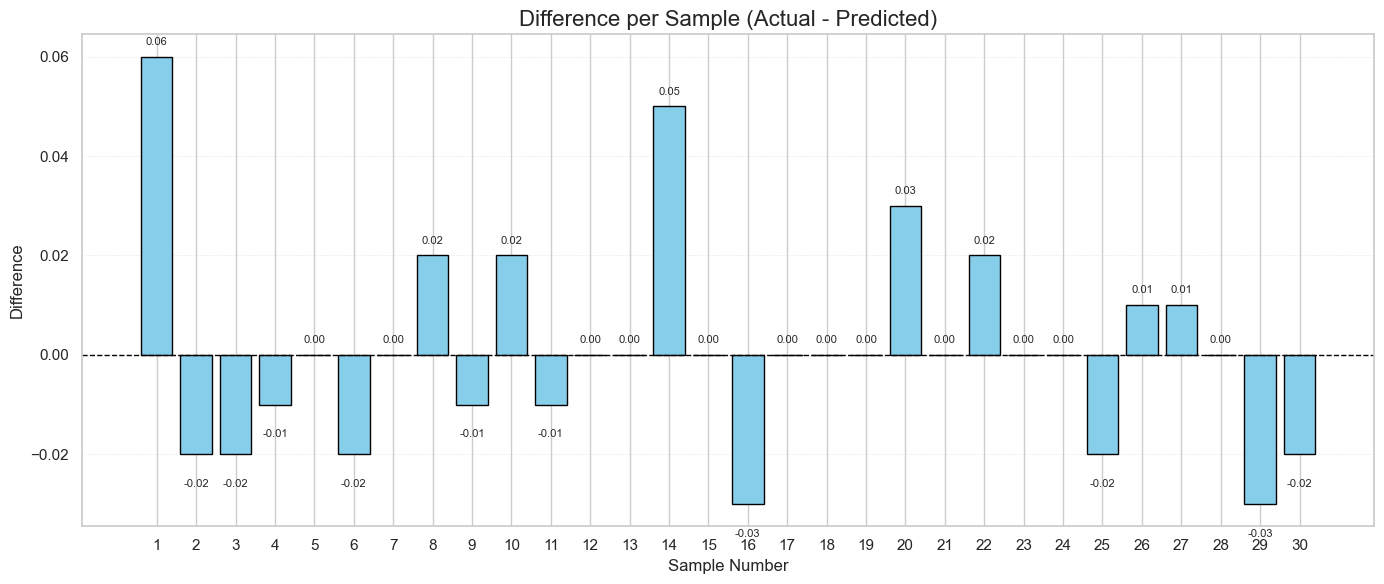

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Actual and predicted values from your message
actual = np.array([
    0.40, 0.40, 0.40, 0.40, 0.40, 0.38, 0.38, 0.40, 0.40, 0.43,
    0.43, 0.43, 0.43, 0.48, 0.48, 0.45, 0.45, 0.45, 0.45, 0.48,
    0.48, 0.50, 0.50, 0.50, 0.48, 0.48, 0.48, 0.48, 0.45, 0.43
])
predicted = np.array([
    0.34, 0.42, 0.42, 0.41, 0.40, 0.40, 0.38, 0.38, 0.41, 0.41,
    0.44, 0.43, 0.43, 0.43, 0.48, 0.48, 0.45, 0.45, 0.45, 0.45,
    0.48, 0.48, 0.50, 0.50, 0.50, 0.47, 0.47, 0.48, 0.48, 0.45
])

# Calculate differences
differences = np.round(actual - predicted, 3)

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(np.arange(1, len(differences) + 1), differences, color='skyblue', edgecolor='black')

# Annotate each bar with the value
for i, diff in enumerate(differences):
    plt.text(i + 1, diff + 0.002 if diff >= 0 else diff - 0.005, f"{diff:.2f}",
             ha='center', va='bottom' if diff >= 0 else 'top', fontsize=8)

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Difference per Sample (Actual - Predicted)", fontsize=16)
plt.xlabel("Sample Number", fontsize=12)
plt.ylabel("Difference", fontsize=12)
plt.xticks(np.arange(1, len(differences) + 1))
plt.tight_layout()
plt.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.7)
plt.show()

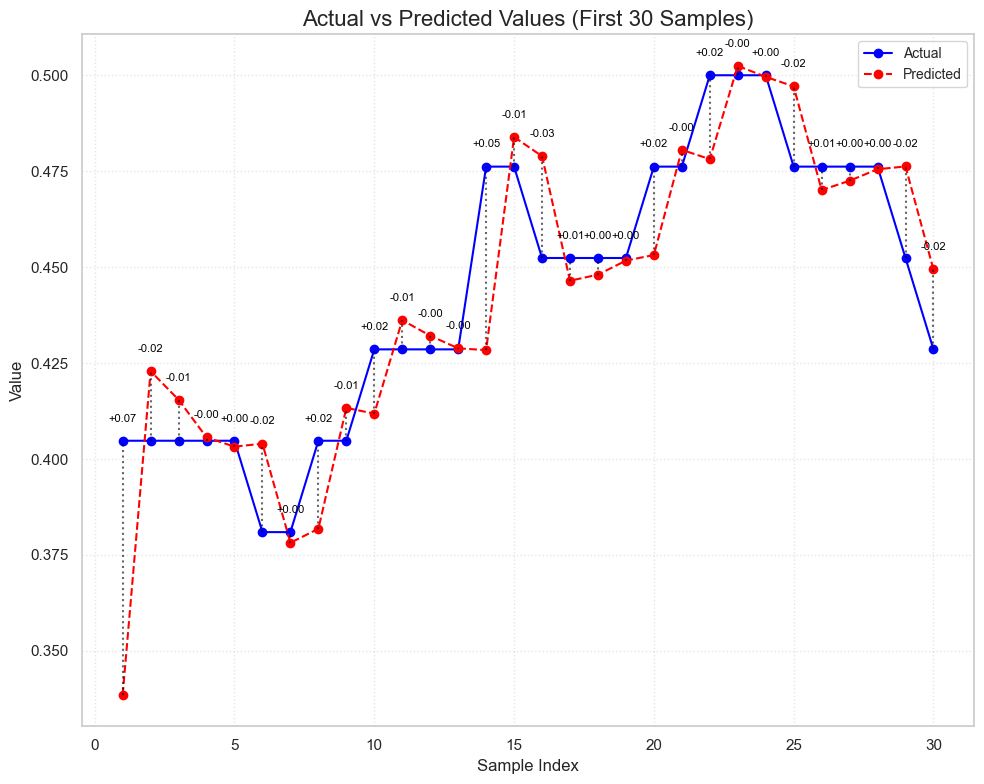

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract the first 30 samples
actual_30 = y_test[:30].flatten()
predicted_30 = y_pred[:30].flatten()
samples = np.arange(1, 31)

# Calculate differences
differences = np.round(actual_30 - predicted_30, 3)

# Create the figure
plt.figure(figsize=(10, 8))

# Plot actual and predicted values
plt.plot(samples, actual_30, marker='o', label='Actual', color='blue')
plt.plot(samples, predicted_30, marker='o', label='Predicted', color='red', linestyle='--')

# Highlight the differences with vertical lines
for i in range(len(samples)):
    plt.vlines(x=samples[i], ymin=min(actual_30[i], predicted_30[i]), ymax=max(actual_30[i], predicted_30[i]),
               color='black', linestyle=':', alpha=0.6)

# Annotate differences above each line
for i, diff in enumerate(differences):
    plt.text(samples[i], max(actual_30[i], predicted_30[i]) + 0.005, f"{diff:+.2f}", 
             ha='center', fontsize=8, color='black')

# Labels and layout
plt.title("Actual vs Predicted Values (First 30 Samples)", fontsize=16)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()